In [2]:
import sys
sys.path.append("/data/des70.a/data/desgw/O4/Main-Injector-O4b/handlers/")
import short_latency_plots as slp
import numpy as np
import datetime
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot
from matplotlib import pyplot as plt
import healpy as hp
import numpy as np
import ligo.skymap
import pandas as pd
from astroplan import Observer, FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,AtNightConstraint)
from astroplan import is_observable
from astropy.time import Time
from astroplan.plots import plot_airmass
from astropy.visualization import astropy_mpl_style, quantity_support
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.coordinates import get_sun
from astropy.coordinates import get_body
import datetime
import ephem
import json
import os

In [4]:
slp.make_alert_skymap()

TypeError: make_alert_skymap() missing 1 required positional argument: 'map_path'

In [12]:

def moon_airmass(event_name, todays_date, target_coords):
    date = datetime.date.today()
    m = ephem.Moon(todays_date)
    phase = round(m.moon_phase, 2)
    
    plt.style.use(astropy_mpl_style)
    quantity_support()
    
    
    
    CTIO = EarthLocation.of_site('Cerro Tololo Interamerican Observatory')
    utcoffset = -3*u.hour  # Eastern Daylight Time

    mytime = todays_date
    midnight = Time(mytime) - utcoffset # - -> plus?
    
    
    delta_midnight = np.linspace(-12, 12, 1000)*u.hour
    times_tonight = midnight + delta_midnight

    print(todays_date,times_tonight)

    frame = AltAz(obstime=times_tonight, location=CTIO)
    sunaltazs = get_sun(times_tonight).transform_to(frame)
    
    max_prob_coord = SkyCoord(target_coords[0], target_coords[1], unit="deg",frame='icrs')
    max_prob_coord_altazs = max_prob_coord.transform_to(frame)
    
    
    moon = get_body("moon", times_tonight)
    moonaltazs = moon.transform_to(frame)

    moon_separation = max_prob_coord_altazs.separation(moonaltazs)
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    t = max_prob_coord_altazs.secz
    condition = [i for i in range(len(t)-1) if abs(t[i] - t[i+1]) > 10]
    t[condition] = np.nan
    
    
    l1 = ax1.plot(delta_midnight, moon_separation.deg, color='blue', ls='--', label='Moon separation')
    l2 = ax2.plot(delta_midnight, t, color = 'red', ls='-', label='Max Prob Coord', alpha = 0.5)
    label = ['Moon separation (deg)', 'Max Prob Coord (Airmass)']
    fig.legend(labels=label,
           loc= (0.1, 0.82), fontsize = 9)
    
  
    ax2.grid(visible = False)
    ax1.fill_between(delta_midnight, 0*u.deg, 90*u.deg, 
                     sunaltazs.alt < -0*u.deg, color='0.9', zorder=0)
    ax1.fill_between(delta_midnight, 0*u.deg, 90*u.deg, 
                     sunaltazs.alt < -6*u.deg, color='0.8', zorder=0)
    ax1.fill_between(delta_midnight, 0*u.deg, 90*u.deg, 
                     sunaltazs.alt < -12*u.deg, color='0.7', zorder=0)
    ax1.fill_between(delta_midnight, 0*u.deg, 90*u.deg, 
                     sunaltazs.alt < -18*u.deg, color='0.6', zorder=0)
    
    
    ax1.text(-3, 80, 'Moon phase = {}'.format(phase),bbox=dict(facecolor='blue', alpha = 0.3))
    ax1.set_title(todays_date)
    ax1.set_xlim(-12*u.hour, 12*u.hour)
    ax1.set_xticks((np.arange(13)*2-12)*u.hour)
    ax1.set_ylim(0*u.deg, 90*u.deg)
    ax1.set_xlabel('Hours from CTIO Local Midnight (UTC-3)')
    ax1.set_ylabel('Altitude [deg]')
    ax2.set_ylabel('Airmass')
    ax2.set_ylim(4,1)

    moon_plot = event_name+'/Moon.png'
    # moon_plot = f'/data/des70.a/data/desgw/O4/Main-Injector-O4b/utils/Moon_{todays_date}.jpg' #uncomment this line if you are using the moonplot figure in utils
    plt.savefig(moon_plot, dpi=300, bbox_inches = "tight")
    os.chmod(moon_plot, 0o0777)
    
    # Clear the current axes.
    plt.cla() 
    # Clear the current figure.
    plt.clf() 
    # Closes all the figure windows.
    plt.close('all')
    
    return moon_plot

2024-09-14 ['2024-09-13 15:00:00.000' '2024-09-13 15:01:26.486'
 '2024-09-13 15:02:52.973' ... '2024-09-14 14:57:07.027'
 '2024-09-14 14:58:33.514' '2024-09-14 15:00:00.000']


FileNotFoundError: [Errno 2] No such file or directory: 'S240413p/Moon.png'

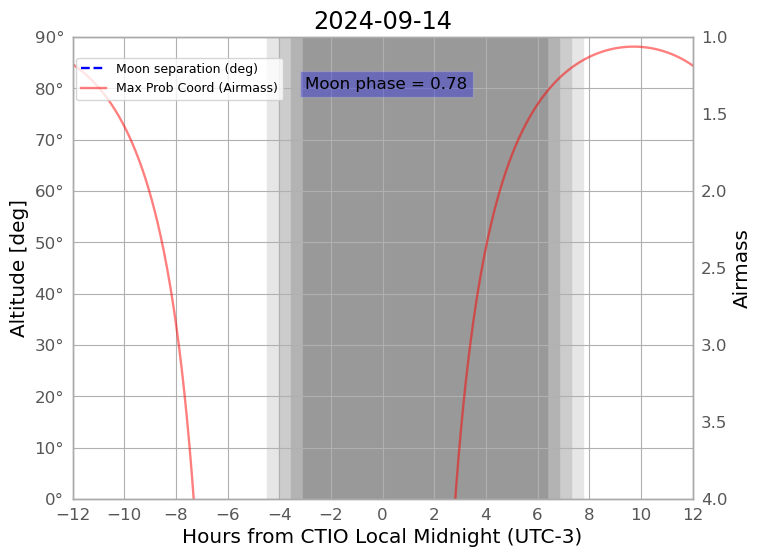

In [13]:
target_coords = [113.83, -49.75]
arr = np.arange(14,30,step=1,dtype=int)
for day in arr:
    date = "2024-09-"+str(day)
    moon_airmass("S240413p", date, target_coords)

In [ ]:
import astropy

In [16]:
mycoord1  = SkyCoord(target_coords[0],target_coords[1], unit="deg",frame='icrs')
mycoord2 = SkyCoord(127.429, -42.228, unit="deg",frame='icrs')

In [20]:
todays_date = "2024-09-14"
date = datetime.date.today()
m = ephem.Moon(todays_date)
phase = round(m.moon_phase, 2)

plt.style.use(astropy_mpl_style)
quantity_support()



CTIO = EarthLocation.of_site('Cerro Tololo Interamerican Observatory')
utcoffset = -3*u.hour  # Eastern Daylight Time

mytime = todays_date
midnight = Time(mytime) - utcoffset # - -> plus?


delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times_tonight = midnight + delta_midnight

In [21]:
frame = AltAz(obstime=times_tonight, location=CTIO)
